# Python Visulization of SpringSaLaD Molecule Counts

This notebook demonstrates different ways to use the stdevPlots function to make visualizations. The file used for the analysis (R_L_test.txt) as well as the output CSV for 24 runs of the simulation can be found in the same directory as this notebook.

In [10]:
#Import necessary functions and data
import Plotter
from data_locator import *

In [11]:
#Find the CSV data file

#Create the relative path to your desired SIMULATIONS directory
search_directory = os.path.join('Examples','Nephrin-Nck-NWasp','Final_version_test_SIMULATIONS')
#A .txt file will be searched for in the search direcotry if one is not provided
input_file = 'Simulation0_SIM.txt'

path = find_molecule_counts(search_directory, input_file)
print(path)

Examples\Nephrin-Nck-NWasp\Final_version_test_SIMULATIONS\Simulation0_SIM_FOLDER\data\Simulation0_SIM_AverageMoleculeCounts_0_5.csv


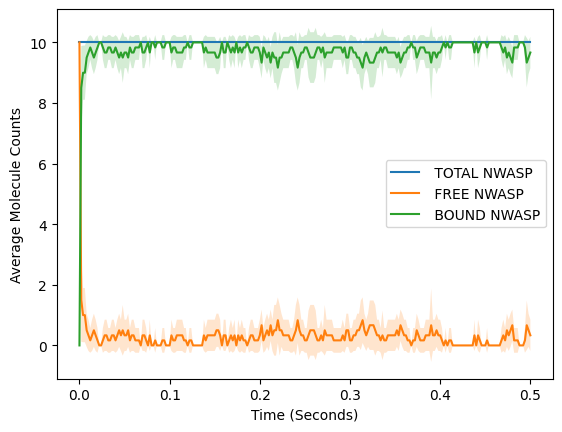

In [12]:
#Plot data for a specific molecule
Plotter.stdevPlots(path, ['NWASP'])

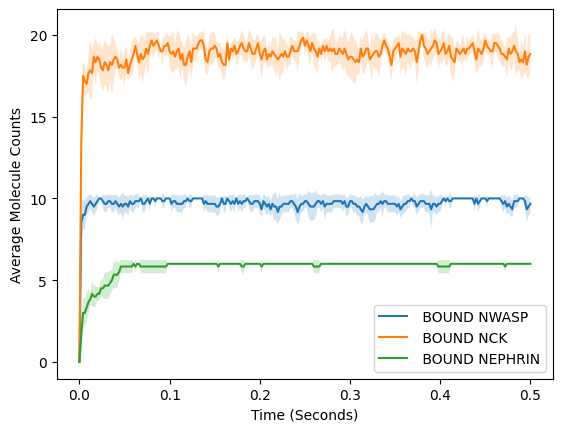

In [13]:
#Plot data for a specific state
Plotter.stdevPlots(path, ['bound'])

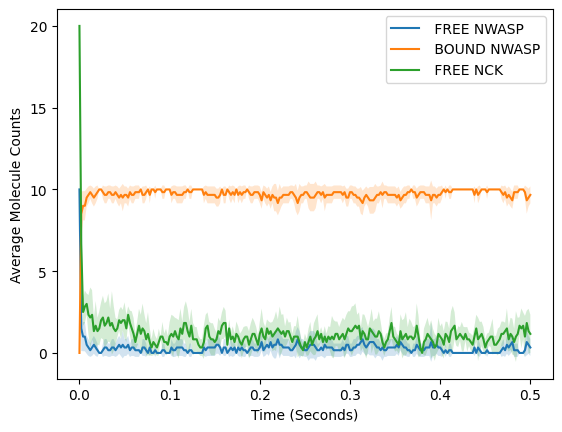

In [14]:
#Plot specific columns with their indicies in the CSV (the first column of data is 1)
Plotter.stdevPlots(path, [2,3,5])

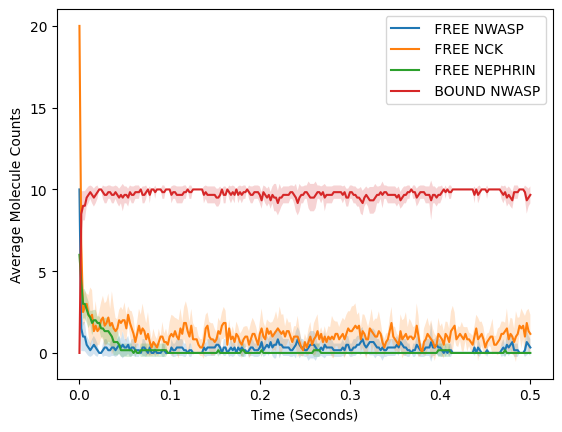

In [15]:
#Use any combination of the above options
Plotter.stdevPlots(path, ['free', 3])